In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from functools import reduce

In [3]:
# Load the dataset
df = pd.read_csv('iris.data', header=None)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
# df.describe(include='all')
# df['Species'].value_counts()
# df['Species'].value_counts().plot(kind='bar')

In [4]:
# print(df.info())
# print(df['Species'].unique())

# Encode categorical variables
one_hot_encoded = pd.get_dummies(df['Species'])
df_encoded = pd.concat([df.drop('Species', axis=1), one_hot_encoded], axis=1)

# Perform test train split
X_train, X_test, y_train, y_test = train_test_split(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df['Species'], test_size=0.2, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


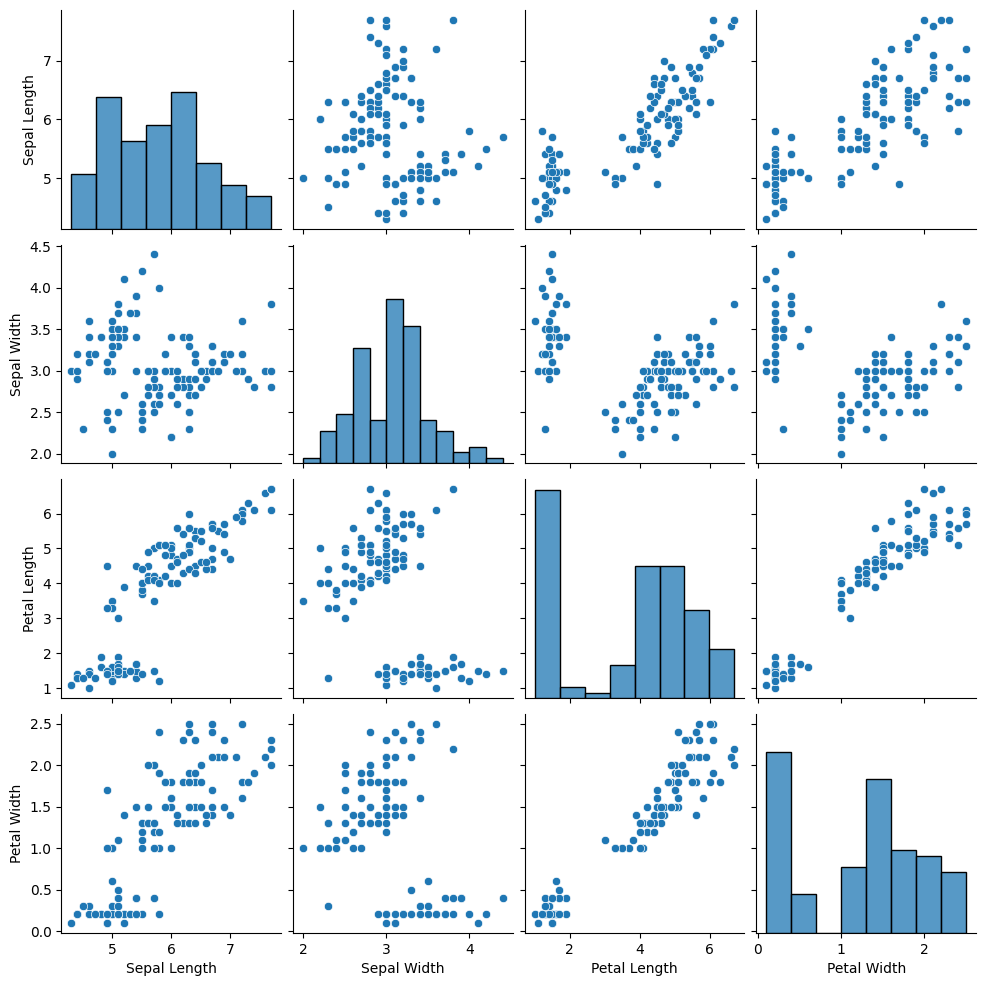

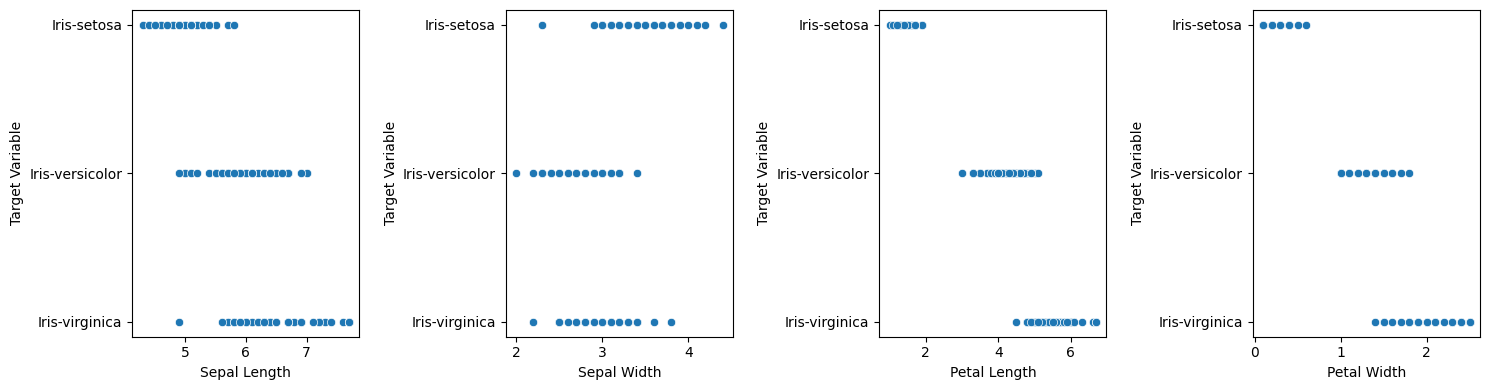

In [5]:
# Exploratory Data Analysis

# Plot relationships among dependent varibales
sns.pairplot(X_train)
correlation_matrix = X_train.corr()

# Print the correlation matrix
# display(correlation_matrix)
# Petal Length & Petal Width , Petal Length and Sepal Width, Petal width and Sepal Length


num_features = X_train.shape[1]  # Number of input features
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 4))

# Plot each input feature against the output feature
for i, feature in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[feature], y=y_train, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target Variable')

plt.tight_layout()
plt.show()
# display(X_train)

In [6]:
# Define model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Define Feature Selection via foward selection
selector = SequentialFeatureSelector(model, direction='forward')

# Define K-fold cross validation
kf = KFold(5, shuffle=True, random_state=42)

# Store features for each fold
featurePerFold = []

# Iterate of each fold and record features
for trainIndices, valIndicies in kf.split(X_train):
    # Split data
    xtrainFold = X_train.iloc[trainIndices]
    ytrainFold = y_train.iloc[trainIndices]
    # display(xtrainFold)

    # Fit selector on training data
    selector.fit(xtrainFold, ytrainFold)

    # Get indices of corresponding features
    selected_indices = selector.get_support(indices=True)

    # Store feature for fold
    featurePerFold.append(selected_indices)

# Finds best feature in common over each fold
common_features = reduce(np.intersect1d, featurePerFold)

# print(common_features)

# Slice data, keeping only features across each fold
X_train = X_train.iloc[:, common_features[0]]
X_test = X_test.iloc[:, common_features[0]]

# display(X_train)



In [7]:
if isinstance(X_train, pd.Series):
  X_train = X_train.to_frame(name='Input')
if isinstance(X_test, pd.Series):
  X_test = X_test.to_frame(name='Input')


model.fit(X_train, y_train)

# # Make predictions on the test set
y_pred = model.predict(X_test)

# # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print precision, recall, and F1-score for each class
for i in range(len(precision)):
    print(f"Class {i}: Precision = {precision[i]}, Recall = {recall[i]}, F1-score = {f1[i]}")

# If you want the macro-averaged precision, recall, and F1-score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

print("Macro-averaged Precision:", macro_precision)
print("Macro-averaged Recall:", macro_recall)
print("Macro-averaged F1-score:", macro_f1)

Accuracy: 1.0
Class 0: Precision = 1.0, Recall = 1.0, F1-score = 1.0
Class 1: Precision = 1.0, Recall = 1.0, F1-score = 1.0
Class 2: Precision = 1.0, Recall = 1.0, F1-score = 1.0
Macro-averaged Precision: 1.0
Macro-averaged Recall: 1.0
Macro-averaged F1-score: 1.0
